In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from PIL import Image
import numpy as np

In [2]:
def load_image(path):
    img = Image.open(path).convert('L')
    img_data = np.array(img)
    if img_data.size != 784 or len(img_data) != 28:
        img = img.resize((28, 28), Image.ANTIALIAS)
        img_data = np.array(img)
    img_data = img_data / 255.0
    return np.expand_dims(img_data, axis=0)

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def create_model(opt='adam'):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, batch_size=256, verbose=0)
    return model, history

In [11]:
opts = {
    'Adam,lr=0.001': optimizers.Adam(learning_rate=0.001),
    'Adam,lr=0.01': optimizers.Adam(learning_rate=0.01),
    'Adam,lr=0.1': optimizers.Adam(learning_rate=0.1),
    'Adamax,lr=0.001': optimizers.Adamax(learning_rate=0.001),
    'Adamax,lr=0.01': optimizers.Adamax(learning_rate=0.01),
    'Adamax,lr=0.1': optimizers.Adamax(learning_rate=0.1),
    'Nadam,lr=0.001': optimizers.Nadam(learning_rate=0.001),
    'Nadam,lr=0.01': optimizers.Nadam(learning_rate=0.01),
    'Nadam,lr=0.1': optimizers.Nadam(learning_rate=0.1)
}

In [6]:
def test_optimizers(opts):
    stats = {}
    result = {}
    epochs = range(1, 11)
    res_model = None
    max_acc = 0
    best_opt = None
    for p in opts.keys():
        print(p)
        model, history = create_model(opts[p])
        test_loss, test_acc = model.evaluate(test_images, test_labels)
        if test_acc > max_acc:
            res_model = model
            max_acc = test_acc
            best_opt = p
        print("Accuracy:", test_acc)
        print("---------------------")
        stats[p] = [history.history["accuracy"], history.history["loss"]]
        result[p] = test_acc

    plt.figure(figsize=(9, 6))
    for p in stats.keys():
        plt.plot(epochs, stats[p][0], label=p)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
    print("   \n ")

    plt.figure(figsize=(9, 6))
    for p in stats.keys():
        plt.plot(epochs, stats[p][1], label=p)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("Loss")
    plt.legend()
    plt.grid()
    plt.show()
    print("  \n ")

    plt.figure(figsize=(14, 8))
    plt.bar(stats.keys(), result.values())
    plt.title("Accuracy")
    plt.show()
    print("  \n ")

    print(result.values())
    return res_model, best_opt

Adam,lr=0.001
313/313 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9782
Accuracy: 0.9782000184059143
---------------------
Adam,lr=0.01
313/313 [==============================] - 1s 2ms/step - loss: 0.1173 - accuracy: 0.9767
Accuracy: 0.9767000079154968
---------------------
Adam,lr=0.1
313/313 [==============================] - 1s 4ms/step - loss: 0.5641 - accuracy: 0.8954
Accuracy: 0.8953999876976013
---------------------
Adamax,lr=0.001
313/313 [==============================] - 1s 2ms/step - loss: 0.0971 - accuracy: 0.9713
Accuracy: 0.9713000059127808
---------------------
Adamax,lr=0.01
313/313 [==============================] - 1s 4ms/step - loss: 0.0660 - accuracy: 0.9819
Accuracy: 0.9818999767303467
---------------------
Adamax,lr=0.1
313/313 [==============================] - 1s 3ms/step - loss: 0.1430 - accuracy: 0.9653
Accuracy: 0.9653000235557556
---------------------
Nadam,lr=0.001
313/313 [==============================] - 1s 3ms/step - loss

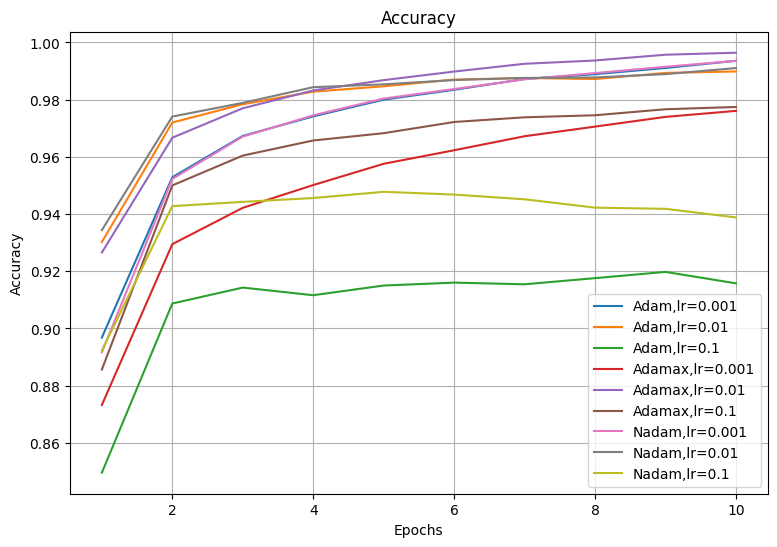

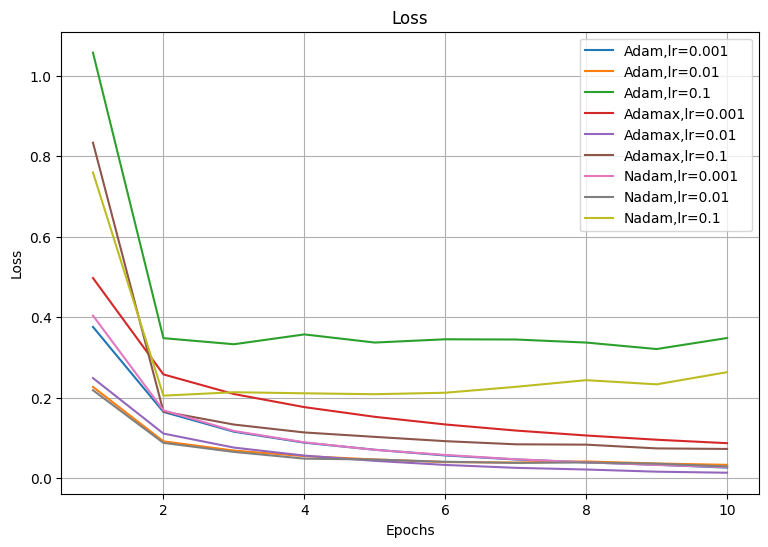

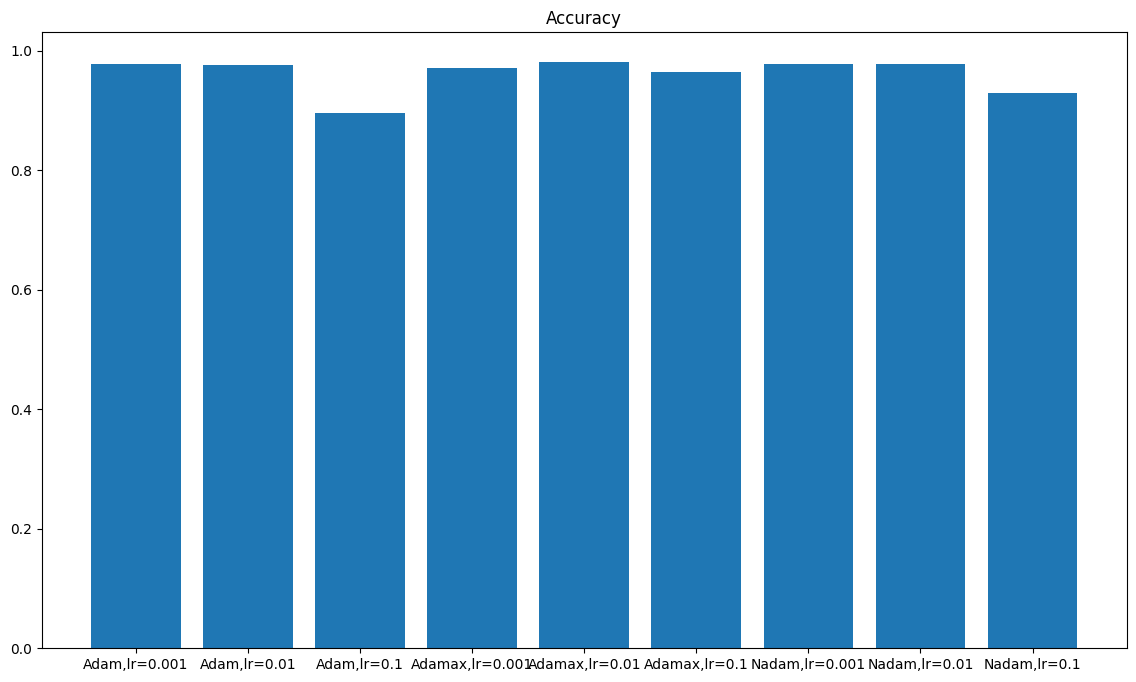

  
 
dict_values([0.9782000184059143, 0.9767000079154968, 0.8953999876976013, 0.9713000059127808, 0.9818999767303467, 0.9653000235557556, 0.9782000184059143, 0.977400004863739, 0.9294999837875366])
Testing best model with optimizer Adamax,lr=0.01 on custom images:
1/1 [==============================] - 0s 77ms/step
Loaded image : [0]
1/1 [==============================] - 0s 32ms/step
Loaded image : [1]
1/1 [==============================] - 0s 45ms/step
Loaded image : [2]
1/1 [==============================] - 0s 42ms/step
Loaded image : [3]
1/1 [==============================] - 0s 33ms/step
Loaded image : [4]
1/1 [==============================] - 0s 38ms/step
Loaded image : [5]
1/1 [==============================] - 0s 39ms/step
Loaded image : [8]
1/1 [==============================] - 0s 32ms/step
Loaded image : [7]


In [12]:
model, best_opt = test_optimizers(opts)
print("Testing best model with optimizer", best_opt, "on custom images:")
image = load_image('image_0.png')
print('Loaded image :', np.argmax(model.predict(image), axis=-1))
image = load_image('image_1.png')
print('Loaded image :', np.argmax(model.predict(image), axis=-1))
image = load_image('image_2.png')
print('Loaded image :', np.argmax(model.predict(image), axis=-1))
image = load_image('image_3.png')
print('Loaded image :', np.argmax(model.predict(image), axis=-1))
image = load_image('image_4.png')
print('Loaded image :', np.argmax(model.predict(image), axis=-1))
image = load_image('image_5.png')
print('Loaded image :', np.argmax(model.predict(image), axis=-1))
image = load_image('image_8.png')
print('Loaded image :', np.argmax(model.predict(image), axis=-1))
image = load_image('image_7.png')
print('Loaded image :', np.argmax(model.predict(image), axis=-1))